<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# read the data
df_bank = pd.read_csv("bank_churn.csv")

# display the first five rows of the data
df_bank.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.000000,1,1,1
1,608,Spain,Female,41,1,83807.860000,1,0,0
2,502,France,Female,42,8,159660.800000,3,1,1
3,699,France,Female,39,1,0.000000,2,0,0
4,850,Spain,Female,43,2,125510.820000,1,1,0


Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

We plot a count plot of the target variable and check the proportion of binary classes.

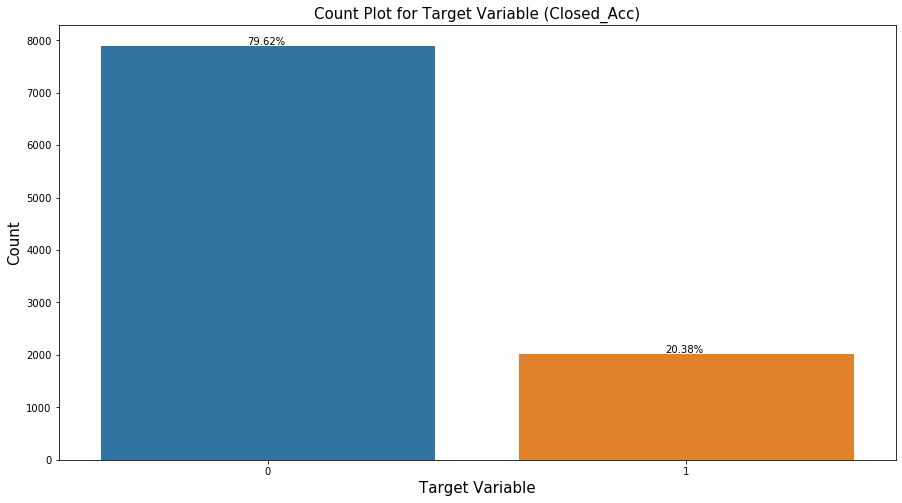

In [4]:
# consider only the target variable
df_target = df_bank['Closed_Acc']

# get counts of 0's and 1's in the 'Closed_Acc' variable
df_target.value_counts()

# plot the countplot of the variable 'Closed_Acc'
sns.countplot(x = df_target)

# use below code to print the percentage values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text to be printed
plt.text(x = -0.05, y = df_target.value_counts()[0] + 20, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] + 20, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Closed_Acc)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

**Interpretation:** The percentage of the customers who do not close the account is 79.62% and the customers who closed the account are 20.38%. 
Thus, we can say that there is no imbalance in the target variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# we can ignore the probability threshold as it is not required to calculate the odds
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_bank.select_dtypes(include=np.number).drop(["Closed_Acc"],axis=1)

# scale all the numeric independent variables
# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_bank.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_cat, drop_first=True)

# concatenate the scaled numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num_scaled, dummy_variables],axis=1)

# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# consider the dependent variable
y = df_bank["Closed_Acc"]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

# build the model on train data 
# use fit() to fit the logistic regression model
logreg_full = sm.Logit(y_train, X_train).fit()

# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg_full.params), columns= ['Odds']) 

# print the dataframe
df_odds

Optimization terminated successfully.
         Current function value: 0.441849
         Iterations 6


,Odds
const,0.230789
CreditScore,0.944647
Age,2.042779
NumOfYrsWithBank,0.986998
Balance,1.183638
NumOfProducts,0.939485
HasCrCard,0.981084
Geography_Germany,2.102382
Geography_Spain,0.988354
Gender_Male,0.578571


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

We consider the full model in Q2.

In [6]:
# consider a full model in Q2
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test)

# consider the cut-off probability as 0.25
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.25 else 1 for x in y_pred_prob]

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# identify each grid in confusion matrix in terms of correct and wrong predictions 
# True Negatives are denoted by 'TN'
TN = cm[0,0]

# True Positives are denoted by 'TP'
TP = cm[1,1]

# False Positives are denoted by 'FP'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
FN = cm[1,0]

**Sensitivity:**

In [7]:
# calculate the sensitivity
sensitivity = TP / (TP+FN)

# print the value
sensitivity

0.5849514563106796

**Specificity:** 

In [8]:
# calculate the specificity 
specificity = TN / (TN+FP)

# print the value
specificity

0.8072519083969466

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

# initiate logistic regression model 
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 6)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Geography_Germany',
       'Gender_Male'],
      dtype='object')


#### Build the logisitc regression model using the variables obtained from RFE.

In [10]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term
logreg_rfe = sm.Logit(y_train, X_train[['const', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Geography_Germany',
                                        'Gender_Male']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.441889
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7929
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.1239
Time:                        15:35:48   Log-Likelihood:                -3506.8
converged:                       True   LL-Null:                       -4002.6
Covariance Type:            nonrobust   LLR p-value:                6.066e-211
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4691      0.048    -30.640      0.000      -1.563      -1.375
CreditSc

**Do predictions on the test set.**

In [11]:
# let 'y_pred_prob_rfe' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test[['const', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Geography_Germany',
                                             'Gender_Male']])

#### Plot the ROC curve.

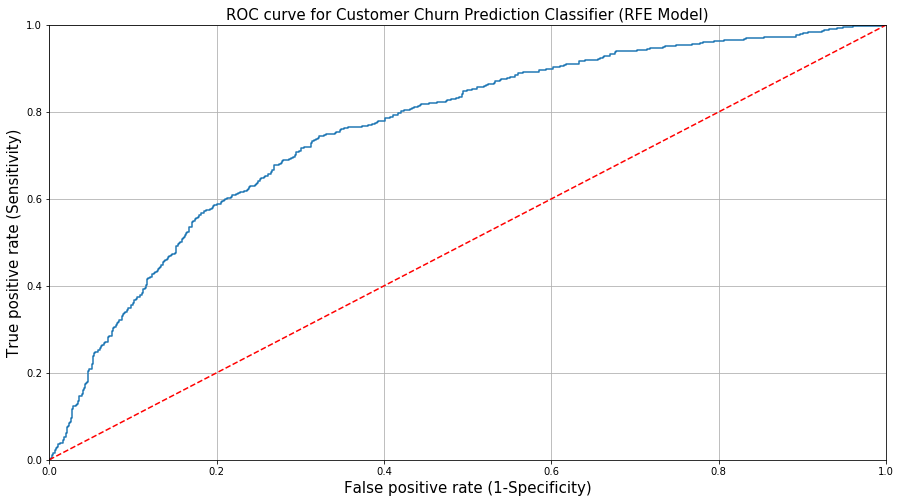

In [12]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Customer Churn Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# use the full model in Q2
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test)

# obtain the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.745146,0.324427,0.183503,0.420718
1,0.742718,0.323155,0.184295,0.419563
2,0.742718,0.324427,0.183828,0.418291
3,0.718447,0.301527,0.192675,0.416920
4,0.737864,0.321883,0.185403,0.415981


**Interpretation:** The above output shows that the maximum difference in TPR and FPR is corresponding to the cut-off value `0.183503`. Thus, we can consider this value as the optimal value for cut-off.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# consider a full model in Q2
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test)

# consider the cut-off probability obtained from Youden's index (i.e. 0.18)
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.18 else 1 for x in y_pred_prob]

We can calculate the performance measures like `f-1 score` and `Accuracy` using the `classification_report()`

In [15]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1572
           1       0.37      0.75      0.49       412

    accuracy                           0.68      1984
   macro avg       0.64      0.70      0.63      1984
weighted avg       0.80      0.68      0.71      1984



**Interpretation:** From the above output, we can see that the model with cut-off = 0.18 is 68% accurate. Also, the f-1 score for the positive and negative class is 0.49 and 0.77 respectively.

**Kappa Score**

In [16]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.2968273378394721


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.18) is 0.2968, we can say that there is a fair agreement between the actual and predicted values.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_bank.select_dtypes(include=np.number).drop(["Closed_Acc"],axis=1)

# create a column of variable names
vif["Features"] = df_num.columns

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF' to store the values 
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# print the dataframe 
vif

,Features,VIF
0,CreditScore,19.674404
1,Age,12.585069
2,NumOfYrsWithBank,3.851630
3,Balance,2.620344
4,NumOfProducts,7.665322
5,HasCrCard,3.289933


Here we consider the threshold as 5. Hence, if VIF > 5 the corresponding variable is involved in multicollinearity. Thus, in this dataset the variables `CreditScore`, `Age` and `NumOfProducts` are involved in multicollinearity. 

But as we remove the variable with highest VIF, the VIF of other variables decreases and even become less than 5. Thus, we remove the variable with highest VIF and calculate the VIF for remaining variables; and repeat this procedure until we get all the variables with VIF < 5.

In [18]:
# drop the 'CreditScore', as it has the highest VIF
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_num.drop('CreditScore', axis = 1)

# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate the VIF for remaining variables
# create a column of variable names
vif["Features"] = df_num.columns

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF' to store the values 
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# print the dataframe 
vif

,Features,VIF
0,Age,8.463241
1,NumOfYrsWithBank,3.643830
2,Balance,2.399719
3,NumOfProducts,5.993526
4,HasCrCard,3.141698


From the above output, we can see that the VIF of remaining variables is decreased. Now, as the variable `Age` has highest VIF; remove the variable and check the VIF of remaining variables.

In [19]:
# drop the 'Age', as it has the highest VIF
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_num.drop('Age', axis = 1)

# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate the VIF for remaining variables
# create a column of variable names
vif["Features"] = df_num.columns

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF' to store the values 
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# print the dataframe 
vif

,Features,VIF
0,NumOfYrsWithBank,3.364968
1,Balance,2.029603
2,NumOfProducts,3.889969
3,HasCrCard,2.948593


**Interpretation:** All the above four variables have VIF < 5. Thus, we can say that the variables `CreditScore` and `Age` are involved in multicollinearity.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# consider the numeric variables obtained after VIF calculation
df_num = df_bank[['NumOfYrsWithBank', 'Balance', 'NumOfProducts', 'HasCrCard']]

# scale all the numeric independent variables
# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_bank.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_cat, drop_first=True)

# concatenate the scaled numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num_scaled, dummy_variables],axis=1)

# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# consider the dependent variable
y = df_bank["Closed_Acc"]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_vif, X_test_vif, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# build the model on train data 
# use fit() to fit the logistic regression model
logreg_vif = sm.Logit(y_train, X_train_vif).fit()

Optimization terminated successfully.
         Current function value: 0.482807
         Iterations 6


**Do predictions on the test set.**

In [21]:
# let 'y_pred_prob_rfe' be the predicted values of y
y_pred_prob_vif = logreg_vif.predict(X_test_vif)

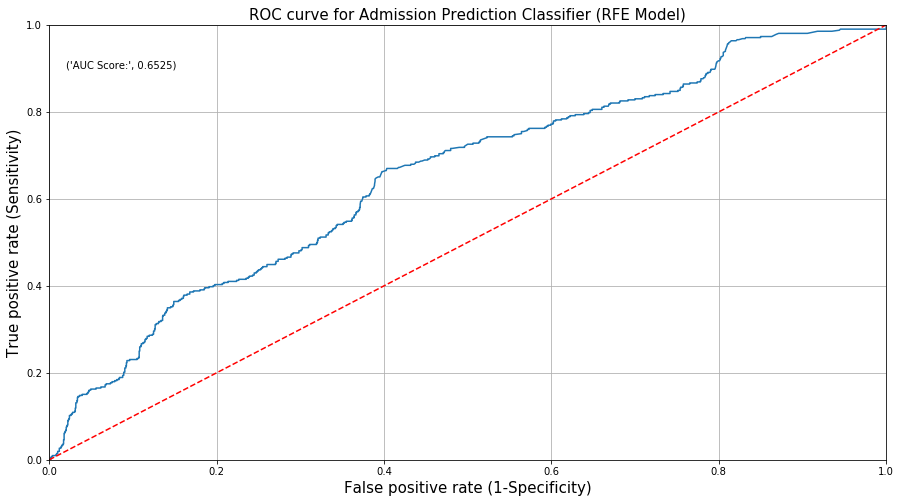

In [22]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_vif)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_prob_vif),4)))
                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 2 and 0.4 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 50):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 2, 0.5) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1

In [24]:
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first five rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head()

,cut-off,total_cost
9,0.190000,472.000000
8,0.180000,474.000000
10,0.200000,480.000000
7,0.170000,480.000000
11,0.210000,488.000000


**Interpretation:** From the above output we can see that, for the cut-off probability `0.19` the total cost is minimum.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us consider the full model in the Q2.

In [25]:
# consider a full model in Q2
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test)

# consider the optimal cut-off probability obtained in Q9 (i.e. 0.19)
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.19 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

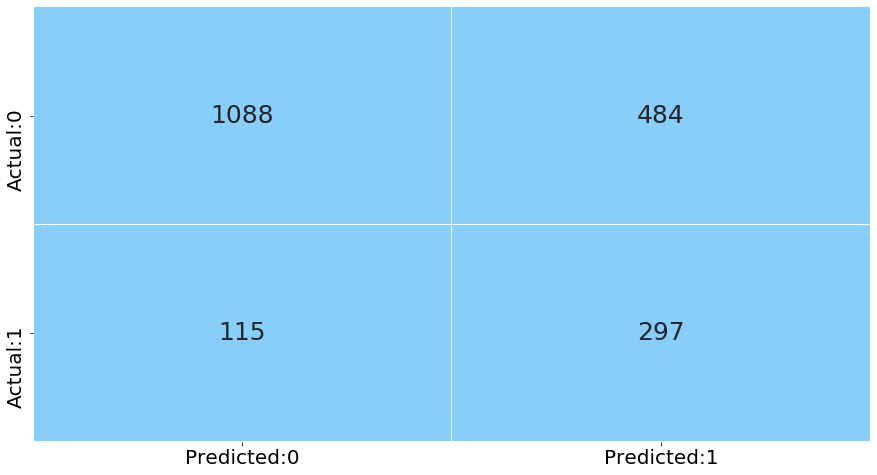

In [26]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Interpretation:** The confusion matrix shows that the model correctly predicts the account status of 1385 customers out of 1984. 

#### Plot the ROC curve.

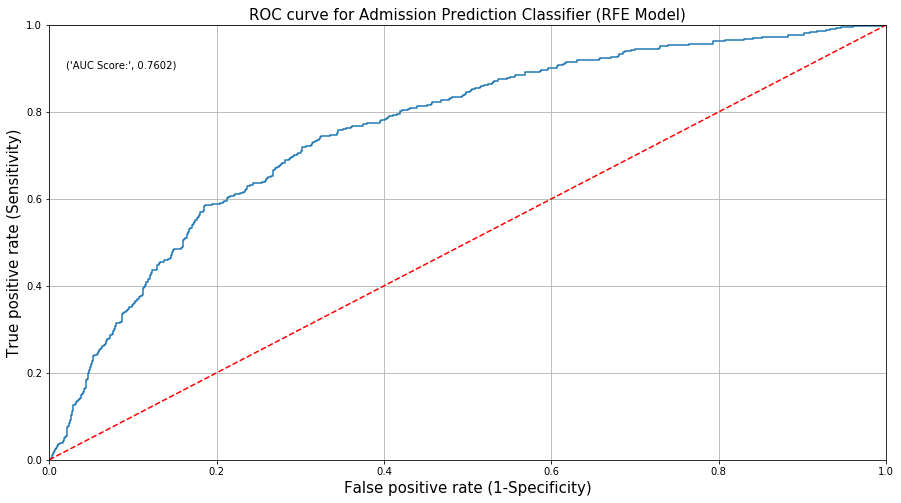

In [27]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier is away from the dotted line; with the AUC score 0.7602